In [1]:
#Run a function file that has functions for importing sql data, simple filters, and visual dots
%run PVModel_Functions.py

In [2]:
#This cell imports all the necessary packages & module data
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datatools
import datetime
import pvlib
import math
import statistics

from sklearn.metrics import mean_squared_error
from math import sqrt

#Set plotting format
%matplotlib inline 
mpl.rcParams['font.size']=10
mpl.rcParams['lines.linewidth']=1
mpl.rcParams['xtick.labelsize']=5
mpl.rcParams['axes.titlesize']=10
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style('whitegrid')
sns.set_context("poster", font_scale=0.75)


In [3]:
from matplotlib.lines import Line2D  

In [4]:
#Reads in an excel file of all necessary module coefficients, string lengths, system dates, etc
mod_info = pd.read_excel('module_coefficients_bhk.xlsx')
mod_info.index = mod_info['Manufacturer']
del mod_info['Manufacturer']
#defines the specific module given the previous user input and module coefficients file
module = mod_info['Panasonic']
start = module['start']
end = module['end']

In [5]:
# obs_std = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Measured POA'])
# iso_std = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Modeled POA'])
# hay_std = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']=='Haydavies - NGD']['Modeled POA'])
# pez_std = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']=='Perez (all1988)- NGD']['Modeled POA'])
# klu_std = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']=='Klucher - NGD']['Modeled POA'])
# rdl_std = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']=='Reindl - NGD']['Modeled POA'])
# king_std = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']=='King - NGD']['Modeled POA'])
# iso_r = np.corrcoef(ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Modeled POA'],
#               ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Measured POA'])
# hay_r = np.corrcoef(ngd_poa_results.loc[ngd_poa_results['Model']=='Haydavies - NGD']['Modeled POA'],
#               ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Measured POA'])
# pez_r = np.corrcoef(ngd_poa_results.loc[ngd_poa_results['Model']=='Perez (all1988)- NGD']['Modeled POA'],
#               ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Measured POA'])
# klu_r = np.corrcoef(ngd_poa_results.loc[ngd_poa_results['Model']=='Klucher - NGD']['Modeled POA'],
#               ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Measured POA'])
# rdl_r = np.corrcoef(ngd_poa_results.loc[ngd_poa_results['Model']=='Reindl - NGD']['Modeled POA'],
#               ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Measured POA'])
# king_r = np.corrcoef(ngd_poa_results.loc[ngd_poa_results['Model']=='King - NGD']['Modeled POA'],
#               ngd_poa_results.loc[ngd_poa_results['Model']=='Isotropic - NGD']['Measured POA'])
# std = [iso_std, hay_std, pez_std, klu_std, rdl_std, king_std]
# corcef = [iso_r[0][1], hay_r[0][1], pez_r[0][1], klu_r[0][1], rdl_r[0][1], king_r[0][1]]
# l = ['Isotropic', 'Haydavies', 'Perez (all1988)', 'Klucher', 'Reindl', 'King']
# # Output file name
# fname = 'TaylorDiagram.jpg'
# mpl.rcParams['font.size']=10
# srl(obs_std, std, corcef, l, fname)

In [6]:
# # Calculate statistics for Taylor diagram
# # The first array element (e.g. taylor_stats1[0]) corresponds to the 
# # reference series while the second and subsequent elements
# # (e.g. taylor_stats1[1:]) are those for the predicted series.
# taylor_stats1 = sm.taylor_statistics(poa_results.loc[poa_results['Model']=='Isotropic']['Modeled POA']
#                 ,poa_results.loc[poa_results['Model']=='Isotropic']['Measured POA'],'data')
# taylor_stats2 = sm.taylor_statistics(poa_results.loc[poa_results['Model']=='Haydavies']['Modeled POA']
#                 ,poa_results.loc[poa_results['Model']=='Haydavies']['Measured POA'],'data')
# taylor_stats3 = sm.taylor_statistics(poa_results.loc[poa_results['Model']=='Klucher']['Modeled POA']
#                 ,poa_results.loc[poa_results['Model']=='Klucher']['Measured POA'],'data')

# # Store statistics in arrays
# sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
#                  taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
# crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
#                   taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
# ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
#                   taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

In [7]:
inputs = pd.read_excel('Blind_Comp.xlsx')
daterng_all = pd.date_range(start='01/01/2020', end='01/01/2021', freq='H')
daterng_all = daterng_all[~((daterng_all.month == 2) & (daterng_all.day == 29))]
daterng_all = daterng_all.drop(daterng_all[0])
inputs.index = daterng_all
inputs.index = inputs.index.tz_localize('MST')


#commenting out filters for now since they cause errors due to daylight savings (maybe?)

filters = pd.read_csv('filters_8760.csv', index_col=0)
inputs = inputs.merge(filters, on=filters.index)
inputs.index = daterng_all.tz_localize('MST')

inputs = inputs.loc[(inputs['DTU Filter 2'] ==1) & (inputs['DTU Filter 3'] ==1) & (inputs['DTU Filter 4'] ==1) & (inputs['solarGIS_bsrn_pass'] ==1) & (inputs['SNL No Snow'] ==1)]
inputs.drop(['DTU Filter 2', 'DTU Filter 3', 'DTU Filter 4','solarGIS_bsrn_pass', 'SNL No Snow'], axis=1, inplace=True)

# calculate solarposition info (azimuth, zenith, etc)
inputs = inputs.loc[inputs['Measured POA irradiance'] > 100]
inputs = inputs.loc[inputs['Measured DC power'] > 50]

#try shifting the data by 30 minutes back to be at middle of hour and compare to non shifted
#sum yearly amounts and compare bias
#inputs.index = inputs.index - datetime.timedelta(minutes=30)

In [8]:
sdf = pvlib.solarposition.get_solarposition(time=(inputs.index), latitude=module['latitude'], 
        longitude=module['longitude'],temperature=inputs['Ambient Temp'], altitude=module['altitude'])

aoi = pvlib.irradiance.aoi(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'], 
                           solar_zenith = sdf['apparent_zenith'], solar_azimuth=sdf['azimuth'])


#assuming default value for albedo since none was given 
ground_diffuse =  inputs['GHI'] * 0.25 * (1 - np.cos(np.radians(module['tilt']))) * 0.5
poa_direct = (inputs['DNI'] * np.cos(np.radians(aoi)))
poa_direct[poa_direct < 0] = 0
inputs['dni_extra'] = pvlib.irradiance.get_extra_radiation(datetime_or_doy=inputs.index)
inputs['airmass'] = pvlib.atmosphere.get_relative_airmass(zenith=sdf['apparent_zenith'])

In [9]:
results = []

In [10]:
#isotropic model
sky_diffuse = pvlib.irradiance.isotropic(surface_tilt = module['tilt'], dhi=inputs['DHI'])
poa_diffuse = sky_diffuse + ground_diffuse
isotropic_results = (poa_diffuse + poa_direct).to_frame()
isotropic_results.rename(columns = { 0 :'Modeled POA'}, inplace=True)
isotropic_results['Measured POA'] = inputs['Measured POA irradiance']
isotropic_results['DGpoa_%'] = 100*((isotropic_results['Modeled POA']-isotropic_results['Measured POA'])/isotropic_results['Measured POA'])
isotropic_results['DGpoa_W/m2'] = (isotropic_results['Modeled POA']-isotropic_results['Measured POA'])
isotropic_results['Model'] = 'Isotropic'
isotropic_results['Time'] = inputs.index
results.append(isotropic_results)

In [11]:
# #perez model
# sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
#                 dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
#                 solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'])
# poa_diffuse = sky_diffuse + ground_diffuse
# perez_results = (poa_diffuse + poa_direct).to_frame()
# perez_results.rename(columns = {0:'Modeled POA'}, inplace=True)
# perez_results['Measured POA'] = inputs['Measured POA irradiance']
# perez_results['DGpoa_%'] = 100*((perez_results['Modeled POA']-perez_results['Measured POA'])/perez_results['Measured POA'])
# perez_results['DGpoa_W/m2'] = (perez_results['Modeled POA']-perez_results['Measured POA'])
# perez_results['Model'] = 'Perez'
# perez_results['Time'] = inputs.index
# results.append(perez_results)

In [12]:
#perez other model
sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'allsitescomposite1988')
poa_diffuse = sky_diffuse + ground_diffuse
perez_results = (poa_diffuse + poa_direct).to_frame()
perez_results.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_results['Measured POA'] = inputs['Measured POA irradiance']
perez_results['DGpoa_%'] = 100*((perez_results['Modeled POA']-perez_results['Measured POA'])/perez_results['Measured POA'])
perez_results['DGpoa_W/m2'] = (perez_results['Modeled POA']-perez_results['Measured POA'])
perez_results['Model'] = 'Perez (all1988)'
perez_results['Time'] = inputs.index
results.append(perez_results)

In [13]:
#haydavies
sky_diffuse = pvlib.irradiance.haydavies(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'], 
                        dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], 
                        solar_zenith = sdf['apparent_zenith'], solar_azimuth=sdf['azimuth'])
poa_diffuse = sky_diffuse + ground_diffuse
haydavies_results = (poa_diffuse + poa_direct).to_frame()
haydavies_results.rename(columns = {0:'Modeled POA'}, inplace=True)
haydavies_results['Measured POA'] = inputs['Measured POA irradiance']
haydavies_results['DGpoa_%'] = 100*((haydavies_results['Modeled POA']-haydavies_results['Measured POA'])/haydavies_results['Measured POA'])
haydavies_results['DGpoa_W/m2'] = (haydavies_results['Modeled POA']-haydavies_results['Measured POA'])
haydavies_results['Model'] = 'Haydavies'
haydavies_results['Time'] = inputs.index
results.append(haydavies_results)

In [14]:
#klucher
sky_diffuse = pvlib.irradiance.klucher(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'], 
                dhi=inputs['DHI'], ghi = inputs['GHI'], solar_zenith = sdf['apparent_zenith'], solar_azimuth=sdf['azimuth'])
poa_diffuse = sky_diffuse + ground_diffuse
klucher_results = (poa_diffuse + poa_direct).to_frame()
klucher_results.rename(columns = {0:'Modeled POA'}, inplace=True)
klucher_results['Measured POA'] = inputs['Measured POA irradiance']
klucher_results['DGpoa_%'] = 100*((klucher_results['Modeled POA']-klucher_results['Measured POA'])/klucher_results['Measured POA'])
klucher_results['DGpoa_W/m2'] = (klucher_results['Modeled POA']-klucher_results['Measured POA'])
klucher_results['Model'] = 'Klucher'
klucher_results['Time'] = inputs.index
results.append(klucher_results)

In [15]:
#reindl
sky_diffuse = pvlib.irradiance.reindl(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'], 
                dhi=inputs['DHI'],dni=inputs['DNI'], ghi =inputs['GHI'], dni_extra=inputs['dni_extra'], 
                solar_zenith = sdf['apparent_zenith'], solar_azimuth=sdf['azimuth'])
poa_diffuse = sky_diffuse + ground_diffuse
reindl_results = (poa_diffuse + poa_direct).to_frame()
reindl_results.rename(columns = {0:'Modeled POA'}, inplace=True)
reindl_results['Measured POA'] = inputs['Measured POA irradiance']
reindl_results['DGpoa_%'] = 100*((reindl_results['Modeled POA']-reindl_results['Measured POA'])/reindl_results['Measured POA'])
reindl_results['DGpoa_W/m2'] = (reindl_results['Modeled POA']-reindl_results['Measured POA'])
reindl_results['Model'] = 'Reindl'
reindl_results['Time'] = inputs.index
results.append(reindl_results)

In [16]:
#king
sky_diffuse = pvlib.irradiance.king(surface_tilt = module['tilt'],dhi=inputs['DHI'],
                                    ghi=inputs['GHI'],solar_zenith=sdf['apparent_zenith'])
poa_diffuse = sky_diffuse + ground_diffuse
king_results = (poa_diffuse + poa_direct).to_frame()
king_results.rename(columns = { 0 :'Modeled POA'}, inplace=True)
king_results['Measured POA'] = inputs['Measured POA irradiance']
king_results['DGpoa_%'] = 100*((king_results['Modeled POA']-king_results['Measured POA'])/king_results['Measured POA'])
king_results['DGpoa_W/m2'] = (king_results['Modeled POA']-king_results['Measured POA'])
king_results['Model'] = 'King'
king_results['Time'] = inputs.index
results.append(king_results)

In [17]:
poa_results = pd.concat(results, ignore_index=True)
#not making the index time because it throws off the ability to plot ecdf

#poa_results.index = poa_results['Time']
#poa_results = poa_results.loc[~poa_results.index.duplicated(), :]

#because of the irradiance and power filters there are no nans in the df

In [18]:
poa_results_time = poa_results
# poa_results_time.index = poa_results_time.Time
# poa_results_time_grpd = poa_results_time.groupby(['Model', poa_results_time.index.month]).mean()

In [50]:
poa_results['Model'].unique()

array(['Isotropic', 'Perez (all1988)', 'Haydavies', 'Klucher', 'Reindl',
       'King'], dtype=object)

In [51]:
models = poa_results['Model'].unique()
stdevs = []
corrcoefs = []
observed = statistics.stdev(poa_results.loc[poa_results['Model']==models[0]]['Measured POA'])
for model in models:
    stats = statistics.stdev(poa_results.loc[poa_results['Model']==model]['Modeled POA'])
    stdevs.append(stats)
    r = np.corrcoef(poa_results.loc[poa_results['Model']==model]['Modeled POA'],
              poa_results.loc[poa_results['Model']==model]['Measured POA'])[0][1]
    corrcoefs.append(r)
    

In [52]:
markers = ['o','x','+','s','d','^']
colors = ['green','blue','red','purple','orange','brown']
line_0 = Line2D([0], [0], color='black', linewidth=3, linestyle='solid',label='Observed')
line_1 = Line2D([0], [0], color='green', linewidth=3, linestyle='solid',label='Isotropic')
line_2 = Line2D([0], [0], color='blue', linewidth=3, linestyle='solid',label='Perez (all1988)')
line_3 = Line2D([0], [0], color='red', linewidth=3, linestyle='solid',label='Haydavies')
line_4 = Line2D([0], [0], color='orange', linewidth=3, linestyle='solid',label='Reindl')
line_6 = Line2D([0], [0], color='brown', linewidth=3, linestyle='solid',label='King')
line_5 = Line2D([0], [0], color='purple', linewidth=3, linestyle='solid',label='Klucher')
lines = [line_0,line_1,line_2,line_3,line_4,line_5,line_6]


In [53]:
# Output file name
fname = 'TaylorDiagram_poamodels_withgrdfs_lmdevil.svg'
mpl.rcParams['font.size']=10
srl(observed, stdevs, corrcoefs, models, fname, markers, colors, lines)

In [20]:
poa_results.groupby(['Model']).mean()

,Modeled POA,Measured POA,DGpoa_%,DGpoa_W/m2
Model,,,,
Haydavies,642.624492,638.721981,0.575548,3.902510
Isotropic,630.678771,638.721981,-0.862911,-8.043210
King,655.002622,638.721981,3.824487,16.280641
Klucher,647.527365,638.721981,1.805999,8.805384
Perez (all1988),650.110400,638.721981,2.108481,11.388418
Reindl,643.698511,638.721981,0.810109,4.976529


Text(0.5, 1.0, 'Transposition Models - Ground Diffuse Considered')

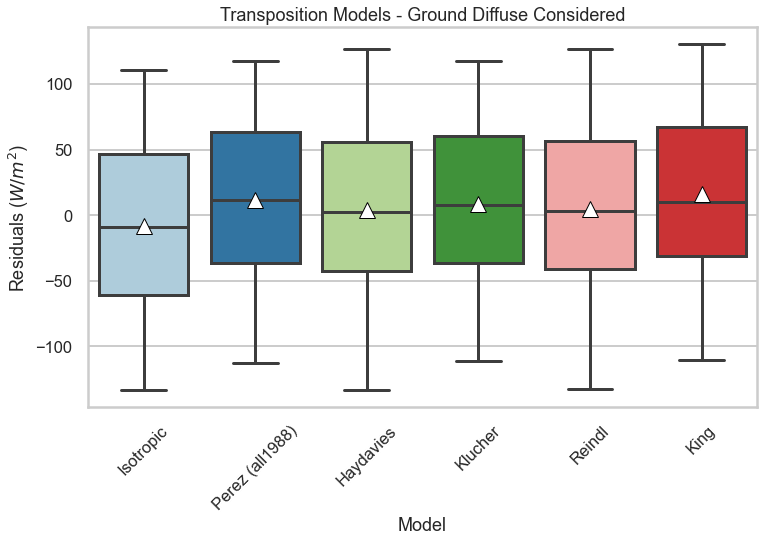

In [21]:
sns.boxplot(data=poa_results, x='Model', y='DGpoa_W/m2', palette='Paired', showmeans=True, showfliers=False,
           meanprops={"markerfacecolor":"white", "markeredgecolor":"black", "markersize":"16"})
plt.xticks(rotation=45)
plt.ylabel('Residuals ($W/m^2$)')
plt.title('Transposition Models - Ground Diffuse Considered')

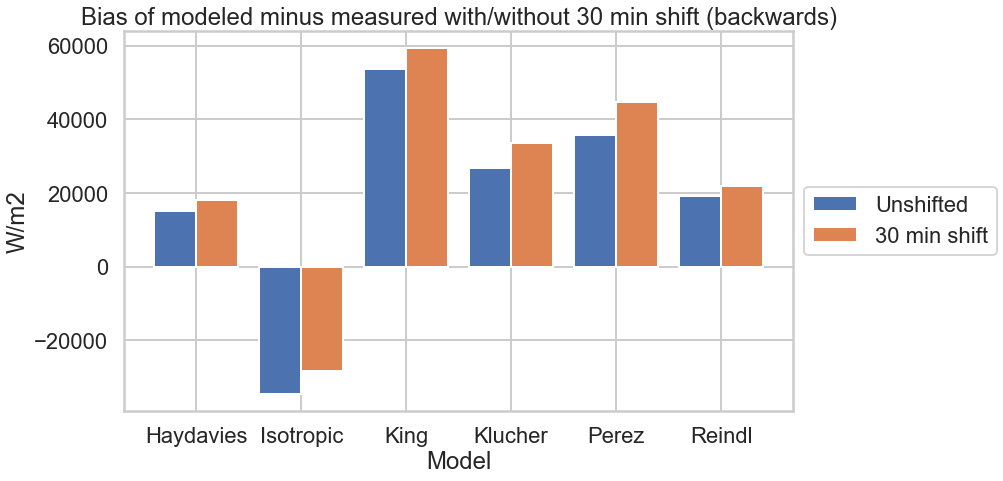

In [43]:
# X = unshifted_res.index
# Y= unshifted_res['Diff']
# Z = unshifted_res['Diff - 30 min shift']
  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, Y, 0.4, label = 'Unshifted')
# plt.bar(X_axis + 0.2, Z, 0.4, label = '30 min shift')
  
# plt.xticks(X_axis, X)
# plt.xlabel("Model")
# plt.ylabel("W/m2")
# plt.title("Bias of modeled minus measured with/without 30 min shift (backwards)")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

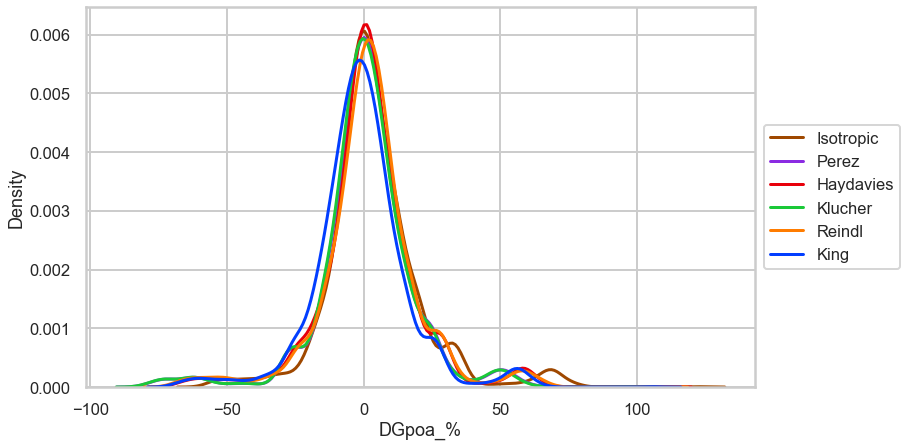

In [14]:
sns.kdeplot(data=poa_results, x='DGpoa_%', hue='Model', palette='bright')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=['Isotropic', 'Perez', 'Haydavies', 'Klucher', 'Reindl', 'King'] )

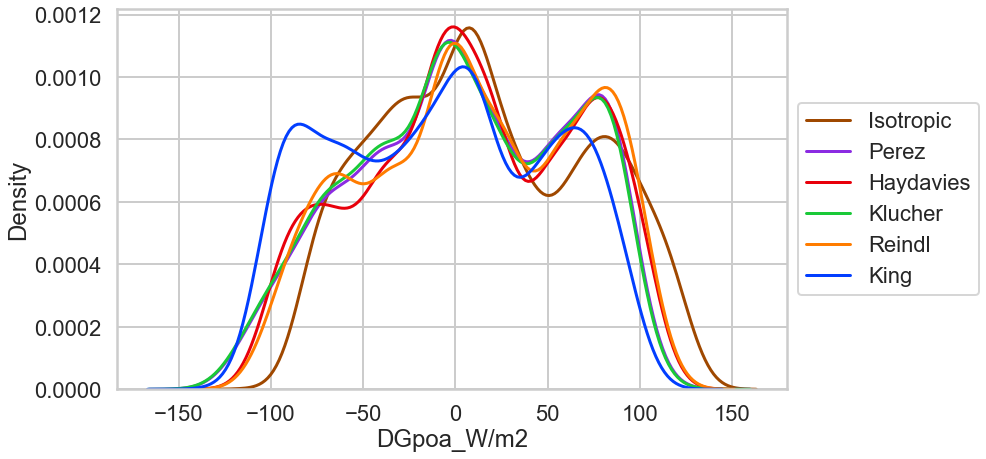

In [18]:
sns.kdeplot(data=poa_results, x='DGpoa_W/m2', hue='Model', palette='bright')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=['Isotropic', 'Perez', 'Haydavies', 'Klucher', 'Reindl', 'King'] )

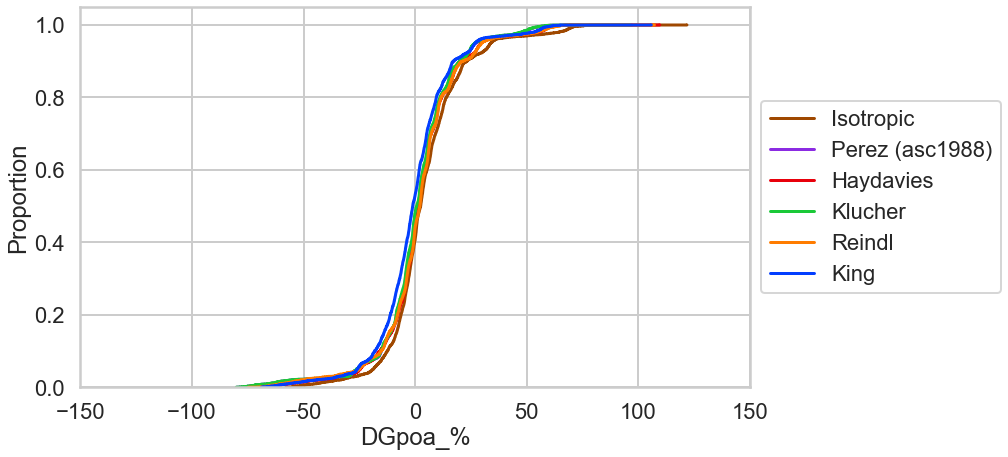

In [19]:
sns.ecdfplot(data=poa_results, x='DGpoa_%', hue='Model', palette='bright')
plt.xlim(-150,150)
plt.ylim(0,1.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=['Isotropic', 'Perez (asc1988)', 'Haydavies', 'Klucher', 'Reindl', 'King'] )

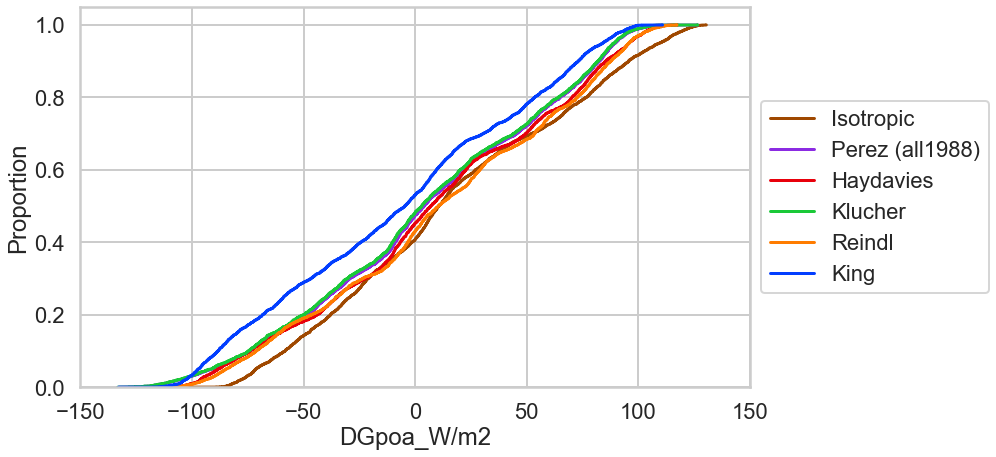

In [22]:
sns.ecdfplot(data=poa_results, x='DGpoa_W/m2', hue='Model', palette='bright')
plt.xlim(-150,150)
plt.ylim(0,1.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=['Isotropic', 'Perez (all1988)', 'Haydavies', 'Klucher', 'Reindl', 'King'] )

## No Ground Diffuse Considered 

In [22]:
ngdresults = []

In [23]:
#running them all again with no ground diffuse
#isotropic model
#isotropic model
poa_diffuse = pvlib.irradiance.isotropic(surface_tilt = module['tilt'], dhi=inputs['DHI'])
isotropic_results = (poa_diffuse + poa_direct).to_frame()
isotropic_results.rename(columns = { 0 :'Modeled POA'}, inplace=True)
isotropic_results['Measured POA'] = inputs['Measured POA irradiance']
isotropic_results['DGpoa_%'] = 100*((isotropic_results['Modeled POA']-isotropic_results['Measured POA'])/isotropic_results['Measured POA'])
isotropic_results['DGpoa_W/m2'] = (isotropic_results['Modeled POA']-isotropic_results['Measured POA'])
isotropic_results['Model'] = 'Isotropic - NGD'
isotropic_results['Time'] = inputs.index
ngdresults.append(isotropic_results)

#perez model
poa_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model='allsitescomposite1988')
perez_results = (poa_diffuse + poa_direct).to_frame()
perez_results.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_results['Measured POA'] = inputs['Measured POA irradiance']
perez_results['DGpoa_%'] = 100*((perez_results['Modeled POA']-perez_results['Measured POA'])/perez_results['Measured POA'])
perez_results['DGpoa_W/m2'] = (perez_results['Modeled POA']-perez_results['Measured POA'])
perez_results['Model'] = 'Perez (all1988)- NGD'
perez_results['Time'] = inputs.index
ngdresults.append(perez_results)

#haydavies
poa_diffuse = pvlib.irradiance.haydavies(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'], 
                        dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], 
                        solar_zenith = sdf['apparent_zenith'], solar_azimuth=sdf['azimuth'])
haydavies_results = (poa_diffuse + poa_direct).to_frame()
haydavies_results.rename(columns = {0:'Modeled POA'}, inplace=True)
haydavies_results['Measured POA'] = inputs['Measured POA irradiance']
haydavies_results['DGpoa_%'] = 100*((haydavies_results['Modeled POA']-haydavies_results['Measured POA'])/haydavies_results['Measured POA'])
haydavies_results['DGpoa_W/m2'] = (haydavies_results['Modeled POA']-haydavies_results['Measured POA'])
haydavies_results['Model'] = 'Haydavies - NGD'
haydavies_results['Time'] = inputs.index
ngdresults.append(haydavies_results)


#klucher
poa_diffuse = pvlib.irradiance.klucher(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'], 
                dhi=inputs['DHI'], ghi = inputs['GHI'], solar_zenith = sdf['apparent_zenith'], solar_azimuth=sdf['azimuth'])
klucher_results = (poa_diffuse + poa_direct).to_frame()
klucher_results.rename(columns = {0:'Modeled POA'}, inplace=True)
klucher_results['Measured POA'] = inputs['Measured POA irradiance']
klucher_results['DGpoa_%'] = 100*((klucher_results['Modeled POA']-klucher_results['Measured POA'])/klucher_results['Measured POA'])
klucher_results['DGpoa_W/m2'] = (klucher_results['Modeled POA']-klucher_results['Measured POA'])
klucher_results['Model'] = 'Klucher - NGD'
klucher_results['Time'] = inputs.index
ngdresults.append(klucher_results)

#reindl
poa_diffuse = pvlib.irradiance.reindl(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'], 
                dhi=inputs['DHI'],dni=inputs['DNI'], ghi =inputs['GHI'], dni_extra=inputs['dni_extra'], 
                solar_zenith = sdf['apparent_zenith'], solar_azimuth=sdf['azimuth'])
reindl_results = (poa_diffuse + poa_direct).to_frame()
reindl_results.rename(columns = {0:'Modeled POA'}, inplace=True)
reindl_results['Measured POA'] = inputs['Measured POA irradiance']
reindl_results['DGpoa_%'] = 100*((reindl_results['Modeled POA']-reindl_results['Measured POA'])/reindl_results['Measured POA'])
reindl_results['DGpoa_W/m2'] = (reindl_results['Modeled POA']-reindl_results['Measured POA'])
reindl_results['Model'] = 'Reindl - NGD'
reindl_results['Time'] = inputs.index
ngdresults.append(reindl_results)

#king
poa_diffuse = pvlib.irradiance.king(surface_tilt = module['tilt'],dhi=inputs['DHI'],
                                    ghi=inputs['GHI'],solar_zenith=sdf['apparent_zenith'])
king_results = (poa_diffuse + poa_direct).to_frame()
king_results.rename(columns = { 0 :'Modeled POA'}, inplace=True)
king_results['Measured POA'] = inputs['Measured POA irradiance']
king_results['DGpoa_%'] = 100*((king_results['Modeled POA']-king_results['Measured POA'])/king_results['Measured POA'])
king_results['DGpoa_W/m2'] = (king_results['Modeled POA']-king_results['Measured POA'])
king_results['Model'] = 'King - NGD'
king_results['Time'] = inputs.index
ngdresults.append(king_results)

In [24]:
ngd_poa_results = pd.concat(ngdresults, ignore_index=True)

In [27]:
ngd_poa_results['Model'].unique()

array(['Isotropic - NGD', 'Perez (all1988)- NGD', 'Haydavies - NGD',
       'Klucher - NGD', 'Reindl - NGD', 'King - NGD'], dtype=object)

In [28]:
models = ngd_poa_results['Model'].unique()
stdevs = []
corrcoefs = []
observed = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']==models[0]]['Measured POA'])
for model in models:
    stats = statistics.stdev(ngd_poa_results.loc[ngd_poa_results['Model']==model]['Modeled POA'])
    stdevs.append(stats)
    r = np.corrcoef(ngd_poa_results.loc[ngd_poa_results['Model']==model]['Modeled POA'],
              ngd_poa_results.loc[ngd_poa_results['Model']==model]['Measured POA'])[0][1]
    corrcoefs.append(r)
    

In [34]:
markers = ['o','x','+','s','d','^']
colors = ['green','blue','red','purple','orange','brown']
line_0 = Line2D([0], [0], color='black', linewidth=3, linestyle='solid',label='Observed')
line_1 = Line2D([0], [0], color='green', linewidth=3, linestyle='solid',label='Isotropic')
line_2 = Line2D([0], [0], color='blue', linewidth=3, linestyle='solid',label='Perez (all1988)')
line_3 = Line2D([0], [0], color='red', linewidth=3, linestyle='solid',label='Haydavies')
line_4 = Line2D([0], [0], color='orange', linewidth=3, linestyle='solid',label='Reindl')
line_6 = Line2D([0], [0], color='brown', linewidth=3, linestyle='solid',label='King')
line_5 = Line2D([0], [0], color='purple', linewidth=3, linestyle='solid',label='Klucher')
lines = [line_0,line_1,line_2,line_3,line_4,line_5,line_6]


In [37]:
# Output file name
fname = 'TaylorDiagram_poamodels_lmdevil.svg'
mpl.rcParams['font.size']=10
srl(observed, stdevs, corrcoefs, models, fname, markers, colors, lines)

In [47]:
rmse = []
models=['Haydavies - NGD', 'Isotropic - NGD', 'King - NGD', 'Klucher - NGD','Perez (all1988)- NGD', 'Reindl - NGD']
ngd_poa_results = ngd_poa_results.dropna()
for model in models:
    rmserror = sqrt(mean_squared_error(ngd_poa_results.loc[ngd_poa_results['Model']==model]['Measured POA'],
                                        ngd_poa_results.loc[ngd_poa_results['Model']==model]['Modeled POA']))
    rmse.append(rmserror)
model_res_ngd = pd.DataFrame(rmse, index=models)

In [48]:
model_res_ngd

,0
Haydavies - NGD,59.451609
Isotropic - NGD,63.272659
King - NGD,57.548649
Klucher - NGD,58.738877
Perez (all1988)- NGD,58.894592
Reindl - NGD,59.260555


In [45]:
ngd_poa_results.groupby(['Model']).mean()

,Modeled POA,Measured POA,DGpoa_%,DGpoa_W/m2,abs DGpoa_%
Model,,,,,
Haydavies - NGD,630.045957,638.721981,-1.509052,-8.676024,11.698356
Isotropic - NGD,618.100237,638.721981,-2.947511,-20.621745,12.106477
King - NGD,642.424088,638.721981,1.739887,3.702106,11.540071
Klucher - NGD,634.948831,638.721981,-0.278601,-3.773151,11.659089
Perez (all1988)- NGD,637.531865,638.721981,0.023881,-1.190116,11.893461
Reindl - NGD,631.119976,638.721981,-1.274491,-7.602005,11.667050


In [69]:
ngd_grps = ngd_poa_results.groupby(['Model']).mean()
ngd_grps['RMSE'] = model_res_ngd[0]

Text(0.5, 0, 'MBE ($W/m^2$)')

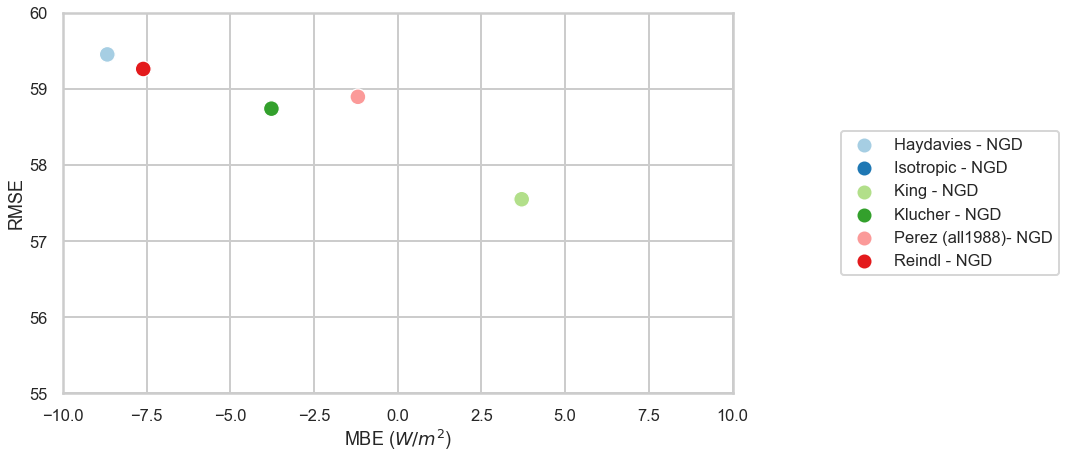

In [70]:
sns.scatterplot(x='DGpoa_W/m2', y='RMSE', data=ngd_grps, hue='Model', palette='Paired', s=250)
plt.legend(loc='center right',bbox_to_anchor=(1.5, 0.5))
plt.ylim(55,60)
plt.xlim(-10,10)
plt.xlabel('MBE ($W/m^2$)')

In [68]:
ngd_poa_results_time = ngd_poa_results
ngd_poa_results_time.index = ngd_poa_results_time.Time
ngd_poa_results_time_grpd = ngd_poa_results_time.groupby(['Model', ngd_poa_results_time.index.month]).mean()

In [43]:
ngd_poa_results['abs DGpoa_%'] = abs(ngd_poa_results['DGpoa_%'])

Text(0, 0.5, 'Residuals ($W/m^2$)')

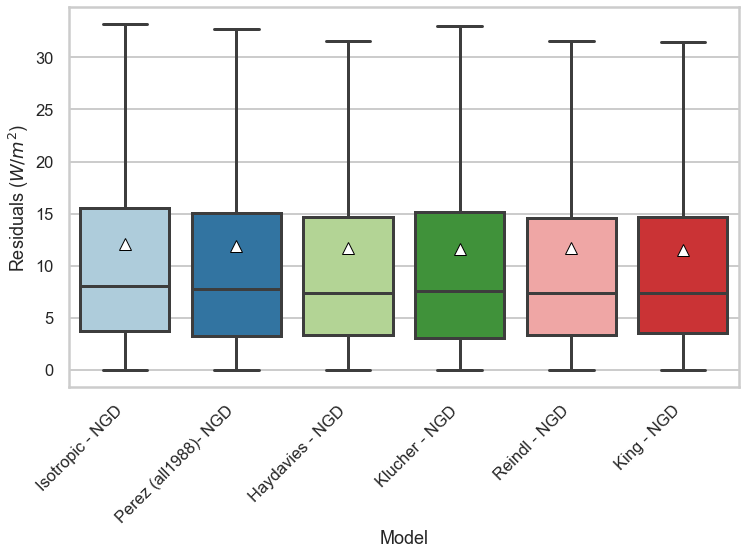

In [44]:
sns.boxplot(data=ngd_poa_results, x='Model', y='abs DGpoa_%', showfliers=False, palette='Paired', showmeans=True,
           meanprops={"markerfacecolor":"white", "markeredgecolor":"black", "markersize":"12"})
plt.xticks(rotation=45, ha='right')
plt.ylabel('Residuals ($W/m^2$)')

Text(0.5, 1.0, 'No Ground Diffuse')

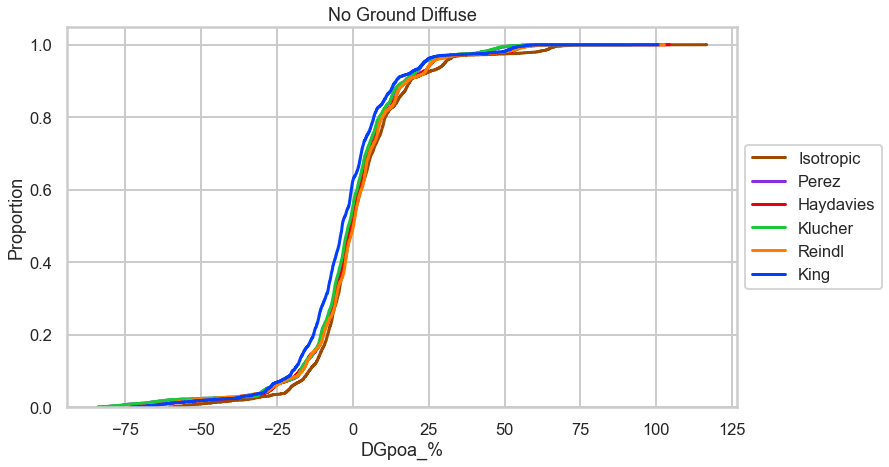

In [39]:
sns.ecdfplot(data=ngd_poa_results, x='DGpoa_%', hue='Model', palette='bright')
#plt.xlim(-200,200)
plt.ylim(0,1.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=['Isotropic', 'Perez', 'Haydavies','Klucher', 'Reindl', 'King'] )
plt.title('No Ground Diffuse')

In [40]:
ngd_comp = ngd_poa_results.groupby(['Model']).mean()['DGpoa_%'].reset_index()
ngd_comp.rename(columns = { 'DGpoa_%':'NoGrDfs DGpoa_%'}, inplace=True)
ngd_comp['GrDfs - DGpoa_%'] = poa_results.groupby(['Model']).mean().reset_index()['DGpoa_%']
ngd_comp.index = ['Haydavies', 'Isotropic', 'King', 'Klucher', 'Perez', 'Reindel']
ngd_comp.drop(['Model'], axis=1, inplace=True)
ngd_comp

,NoGrDfs DGpoa_%,GrDfs - DGpoa_%
Haydavies,-1.509052,0.575548
Isotropic,-2.947511,-0.862911
King,1.739887,3.824487
Klucher,-0.278601,1.805999
Perez,0.023881,2.108481
Reindel,-1.274491,0.810109


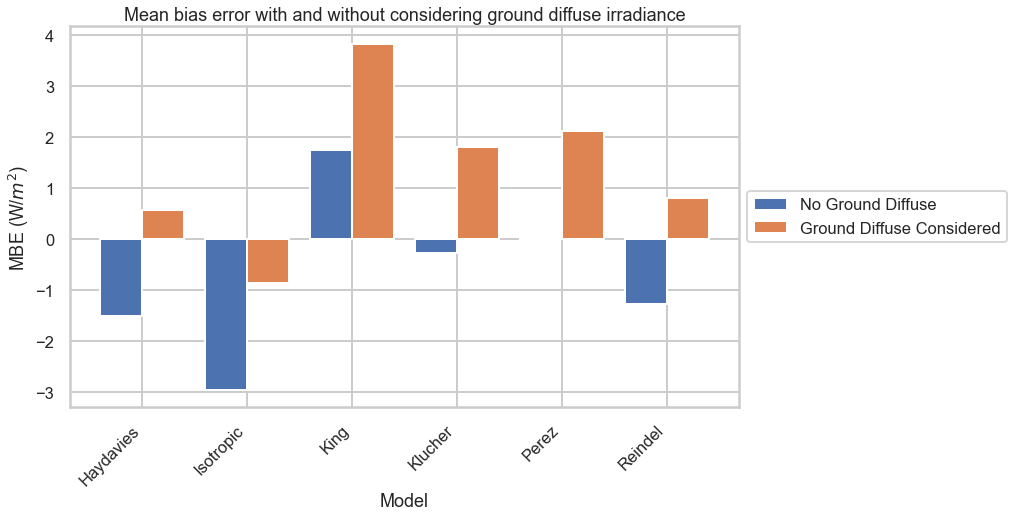

In [25]:
X = ngd_comp.index
Y= ngd_comp['NoGrDfs DGpoa_%']
Z = ngd_comp['GrDfs - DGpoa_%']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'No Ground Diffuse')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Ground Diffuse Considered')
  
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("MBE (W/$m^2$)")
plt.title("Mean bias error with and without considering ground diffuse irradiance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')
plt.show()

## Different Perez Models

In [54]:
peresults = []

In [55]:
#perez models
sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'allsitescomposite1990')
perez_1 = (sky_diffuse + poa_direct).to_frame()
perez_1.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_1['Measured POA'] = inputs['Measured POA irradiance']
perez_1['DGpoa_%'] = 100*((perez_1['Modeled POA']-perez_1['Measured POA'])/perez_1['Measured POA'])
perez_1['DGpoa_W/m2'] = (perez_1['Modeled POA']-perez_1['Measured POA'])
perez_1['Model'] = 'allsitescomposite1990'
perez_1['Time'] = inputs.index
peresults.append(perez_1)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'allsitescomposite1988')
perez_2 = (sky_diffuse + poa_direct).to_frame()
perez_2.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_2['Measured POA'] = inputs['Measured POA irradiance']
perez_2['DGpoa_%'] = 100*((perez_2['Modeled POA']-perez_2['Measured POA'])/perez_2['Measured POA'])
perez_2['DGpoa_W/m2'] = (perez_2['Modeled POA']-perez_2['Measured POA'])
perez_2['Model'] = 'allsitescomposite1988'
perez_2['Time'] = inputs.index
peresults.append(perez_2)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'sandiacomposite1988')
perez_3 = (sky_diffuse + poa_direct).to_frame()
perez_3.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_3['Measured POA'] = inputs['Measured POA irradiance']
perez_3['DGpoa_%'] = 100*((perez_3['Modeled POA']-perez_3['Measured POA'])/perez_3['Measured POA'])
perez_3['DGpoa_W/m2'] = (perez_3['Modeled POA']-perez_3['Measured POA'])
perez_3['Model'] = 'sandiacomposite1988'
perez_3['Time'] = inputs.index
peresults.append(perez_3)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'usacomposite1988')
perez_4 = (sky_diffuse + poa_direct).to_frame()
perez_4.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_4['Measured POA'] = inputs['Measured POA irradiance']
perez_4['DGpoa_%'] = 100*((perez_4['Modeled POA']-perez_4['Measured POA'])/perez_4['Measured POA'])
perez_4['DGpoa_W/m2'] = (perez_4['Modeled POA']-perez_4['Measured POA'])
perez_4['Model'] = 'usacomposite1988'
perez_4['Time'] = inputs.index
peresults.append(perez_4)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'france1988')
perez_5 = (sky_diffuse + poa_direct).to_frame()
perez_5.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_5['Measured POA'] = inputs['Measured POA irradiance']
perez_5['DGpoa_%'] = 100*((perez_5['Modeled POA']-perez_5['Measured POA'])/perez_5['Measured POA'])
perez_5['DGpoa_W/m2'] = (perez_5['Modeled POA']-perez_5['Measured POA'])
perez_5['Model'] = 'france1988'
perez_5['Time'] = inputs.index
peresults.append(perez_5)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'phoenix1988')
perez_6 = (sky_diffuse + poa_direct).to_frame()
perez_6.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_6['Measured POA'] = inputs['Measured POA irradiance']
perez_6['DGpoa_%'] = 100*((perez_6['Modeled POA']-perez_6['Measured POA'])/perez_6['Measured POA'])
perez_6['DGpoa_W/m2'] = (perez_6['Modeled POA']-perez_6['Measured POA'])
perez_6['Model'] = 'phoenix1988'
perez_6['Time'] = inputs.index
peresults.append(perez_6)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'elmonte1988')
perez_7 = (sky_diffuse + poa_direct).to_frame()
perez_7.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_7['Measured POA'] = inputs['Measured POA irradiance']
perez_7['DGpoa_%'] = 100*((perez_7['Modeled POA']-perez_7['Measured POA'])/perez_7['Measured POA'])
perez_7['DGpoa_W/m2'] = (perez_7['Modeled POA']-perez_7['Measured POA'])
perez_7['Model'] = 'elmonte1988'
perez_7['Time'] = inputs.index
peresults.append(perez_7)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'osage1988')
perez_8 = (sky_diffuse + poa_direct).to_frame()
perez_8.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_8['Measured POA'] = inputs['Measured POA irradiance']
perez_8['DGpoa_%'] = 100*((perez_8['Modeled POA']-perez_8['Measured POA'])/perez_8['Measured POA'])
perez_8['DGpoa_W/m2'] = (perez_8['Modeled POA']-perez_8['Measured POA'])
perez_8['Model'] = 'osage1988'
perez_8['Time'] = inputs.index
peresults.append(perez_8)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'albuquerque1988')
perez_9 = (sky_diffuse + poa_direct).to_frame()
perez_9.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_9['Measured POA'] = inputs['Measured POA irradiance']
perez_9['DGpoa_%'] = 100*((perez_9['Modeled POA']-perez_9['Measured POA'])/perez_9['Measured POA'])
perez_9['DGpoa_W/m2'] = (perez_9['Modeled POA']-perez_9['Measured POA'])
perez_9['Model'] = 'albuquerque1988'
perez_9['Time'] = inputs.index
peresults.append(perez_9)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'capecanaveral1988')
perez_10 = (sky_diffuse + poa_direct).to_frame()
perez_10.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_10['Measured POA'] = inputs['Measured POA irradiance']
perez_10['DGpoa_%'] = 100*((perez_10['Modeled POA']-perez_10['Measured POA'])/perez_10['Measured POA'])
perez_10['DGpoa_W/m2'] = (perez_10['Modeled POA']-perez_10['Measured POA'])
perez_10['Model'] = 'capecanaveral1988'
perez_10['Time'] = inputs.index
peresults.append(perez_10)

sky_diffuse = pvlib.irradiance.perez(surface_tilt = module['tilt'], surface_azimuth=module['surface_azimuth'],
                dhi=inputs['DHI'],dni=inputs['DNI'], dni_extra=inputs['dni_extra'], solar_zenith=sdf['apparent_zenith'], 
                solar_azimuth=sdf['azimuth'], airmass=inputs['airmass'], model = 'albany1988')
perez_11 = (sky_diffuse + poa_direct).to_frame()
perez_11.rename(columns = {0:'Modeled POA'}, inplace=True)
perez_11['Measured POA'] = inputs['Measured POA irradiance']
perez_11['DGpoa_%'] = 100*((perez_11['Modeled POA']-perez_11['Measured POA'])/perez_11['Measured POA'])
perez_11['DGpoa_W/m2'] = (perez_11['Modeled POA']-perez_11['Measured POA'])
perez_11['Model'] = 'albany1988'
perez_11['Time'] = inputs.index
peresults.append(perez_11)



In [56]:
perez_poa_results = pd.concat(peresults, ignore_index=True)

In [57]:
perez_poa_results['Model'].unique()

array(['allsitescomposite1990', 'allsitescomposite1988',
       'sandiacomposite1988', 'usacomposite1988', 'france1988',
       'phoenix1988', 'elmonte1988', 'osage1988', 'albuquerque1988',
       'capecanaveral1988', 'albany1988'], dtype=object)

In [59]:
models = perez_poa_results['Model'].unique()
stdevs = []
corrcoefs = []
observed = statistics.stdev(perez_poa_results.loc[perez_poa_results['Model']==models[0]]['Measured POA'])
for model in models:
    stats = statistics.stdev(perez_poa_results.loc[perez_poa_results['Model']==model]['Modeled POA'])
    stdevs.append(stats)
    r = np.corrcoef(perez_poa_results.loc[perez_poa_results['Model']==model]['Modeled POA'],
              perez_poa_results.loc[perez_poa_results['Model']==model]['Measured POA'])[0][1]
    corrcoefs.append(r)
    

In [61]:
markers = ['o','x','+','s','d','^','*','p','X','>','<']
colors = ['green','blue','red','purple','orange','brown','deeppink','yellow','lawngreen','turquoise','saddlebrown']
line_0 = Line2D([0], [0], color='black', linewidth=3, linestyle='solid',label='Observed')
line_1 = Line2D([0], [0], color='green', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[0])
line_2 = Line2D([0], [0], color='blue', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[1])
line_3 = Line2D([0], [0], color='red', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[2])
line_4 = Line2D([0], [0], color='purple', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[3])
line_5 = Line2D([0], [0], color='orange', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[4])
line_6 = Line2D([0], [0], color='brown', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[5])
line_7 = Line2D([0], [0], color='deeppink', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[6])
line_8 = Line2D([0], [0], color='yellow', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[7])
line_9 = Line2D([0], [0], color='lawngreen', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[8])
line_10 = Line2D([0], [0], color='turquoise', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[9])
line_11 = Line2D([0], [0], color='saddlebrown', linewidth=3, linestyle='solid',label=perez_poa_results['Model'].unique()[10])
lines = [line_0,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8,line_9,line_10,line_11]


In [62]:
# Output file name
fname = 'TaylorDiagram_perezmodels_lmdevil.svg'
mpl.rcParams['font.size']=10
srl(observed, stdevs, corrcoefs, models, fname, markers, colors, lines)

In [63]:
rmse = []
models=['albany1988', 'albuquerque1988', 'allsitescomposite1988','allsitescomposite1990', 'capecanaveral1988', 'elmonte1988',
       'france1988', 'osage1988', 'phoenix1988', 'sandiacomposite1988','usacomposite1988']
perez_poa_results = perez_poa_results.dropna()
for model in models:
    rmserror = sqrt(mean_squared_error(perez_poa_results.loc[perez_poa_results['Model']==model]['Measured POA'],
                                        perez_poa_results.loc[perez_poa_results['Model']==model]['Modeled POA']))
    rmse.append(rmserror)
model_res = pd.DataFrame(rmse, index=models)

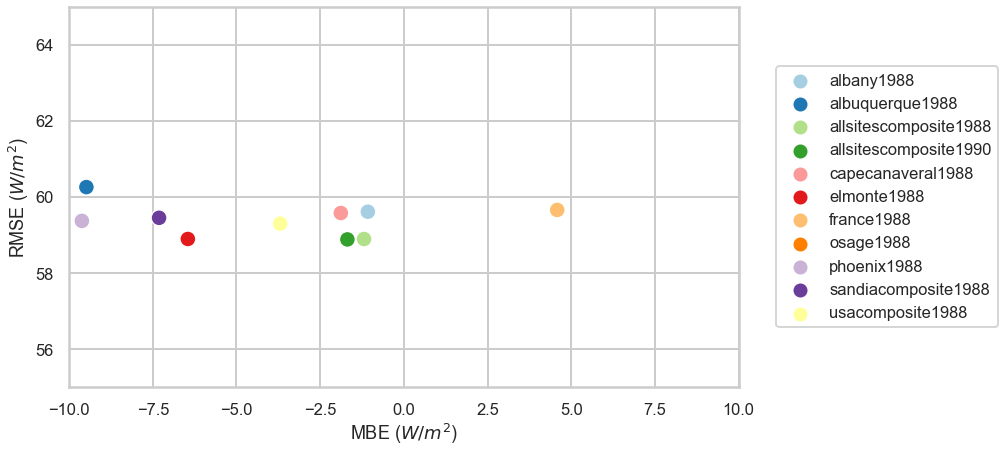

In [73]:
sns.scatterplot(x='DGpoa_W/m2', y='RMSE', data=grpd, hue='Model',s=250, palette='Paired')
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))
plt.ylim(55,65)
plt.xlim(-10,10)
plt.xlabel('MBE ($W/m^2$)')
plt.ylabel('RMSE ($W/m^2$)')
plt.savefig('perez_rmse_mbe.svg',bbox_inches='tight')

In [65]:
grpd = perez_poa_results.groupby('Model').mean()
grpd['Model'] = grpd.index
grpd['RMSE'] = model_res[0]

In [69]:
grpd

,Modeled POA,Measured POA,DGpoa_%,DGpoa_W/m2,RMSE,Model
Model,,,,,,
albany1988,610.758883,611.567681,0.170429,-0.808798,58.386923,albany1988
albuquerque1988,602.715242,611.567681,-1.084165,-8.852439,58.994870,albuquerque1988
allsitescomposite1988,610.655275,611.567681,0.212931,-0.912405,57.690538,allsitescomposite1988
allsitescomposite1990,610.145515,611.567681,-0.017212,-1.422166,57.683153,allsitescomposite1990
capecanaveral1988,609.970179,611.567681,0.104384,-1.597502,58.343387,capecanaveral1988
elmonte1988,605.548263,611.567681,-0.854071,-6.019418,57.669057,elmonte1988
france1988,616.171748,611.567681,1.148881,4.604067,58.457196,france1988
osage1988,587.479666,611.567681,-4.188214,-24.088014,70.562761,osage1988
phoenix1988,602.564574,611.567681,-1.268028,-9.003106,58.121355,phoenix1988


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'albany1988'),
  Text(1, 0, 'albuquerque1988'),
  Text(2, 0, 'allsitescomposite1988'),
  Text(3, 0, 'allsitescomposite1990'),
  Text(4, 0, 'capecanaveral1988'),
  Text(5, 0, 'elmonte1988'),
  Text(6, 0, 'france1988'),
  Text(7, 0, 'osage1988'),
  Text(8, 0, 'phoenix1988'),
  Text(9, 0, 'sandiacomposite1988'),
  Text(10, 0, 'usacomposite1988')])

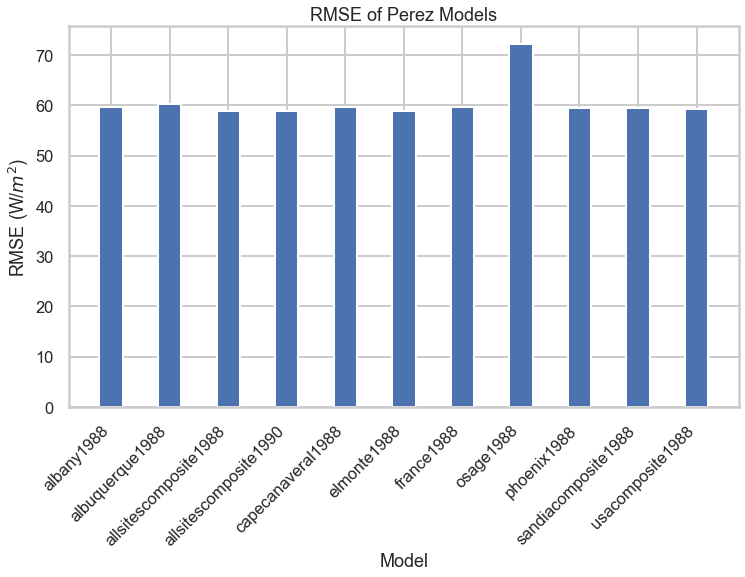

In [32]:
X =model_res.index
Y= model_res[0]
#Z = ngd_comp['GrDfs - DGpoa_W/m2']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, Y, 0.4)
#plt.bar(X_axis + 0.2, Z, 0.4, label = 'Ground Diffuse Considered')
  
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("RMSE (W/$m^2$)")
plt.title("RMSE of Perez Models")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')

# for label in ax.xaxis.get_majorticklabels():
#     label.set_transform(label.get_transform() + offset)
# plt.show()

Text(0.5, 0, 'DGpoa_%')

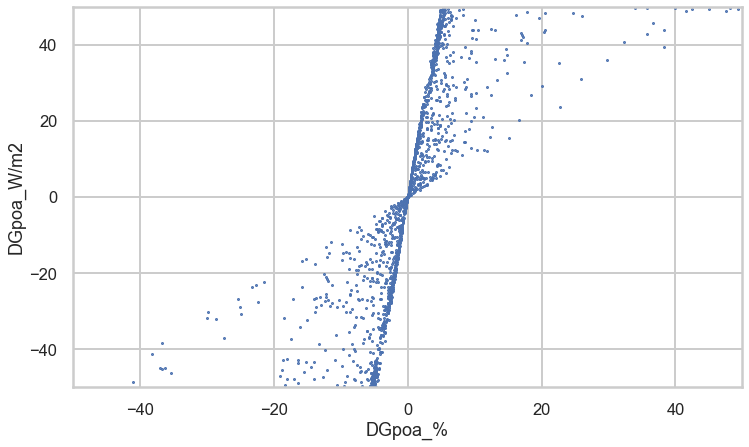

In [33]:
plt.scatter(perez_poa_results.loc[perez_poa_results['Model']=='albany1988']['DGpoa_%'],perez_poa_results.loc[perez_poa_results['Model']=='albany1988']['DGpoa_W/m2'],
            s=1)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.ylabel('DGpoa_W/m2')
plt.xlabel('DGpoa_%')

Text(0, 0.5, 'Residuals ($W/m^2$)')

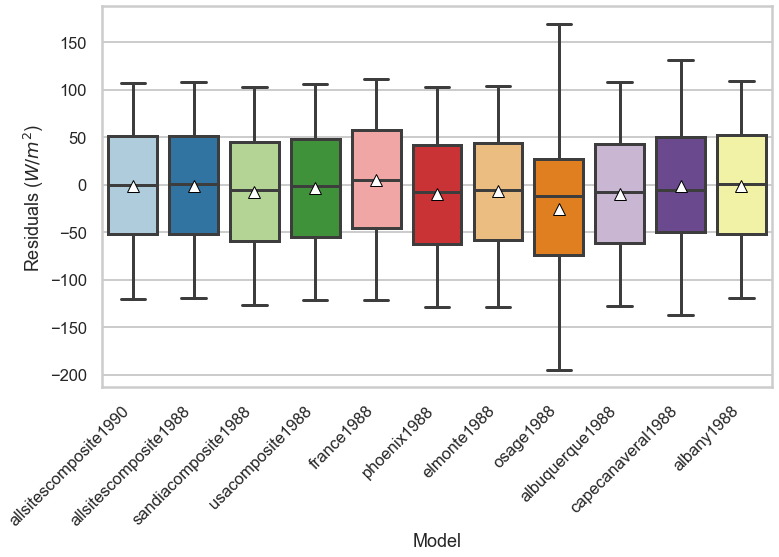

In [35]:
sns.boxplot(data=perez_poa_results, x='Model', y='DGpoa_W/m2', showfliers=False, palette='Paired', showmeans=True,
           meanprops={"markerfacecolor":"white", "markeredgecolor":"black", "markersize":"12"})
plt.xticks(rotation=45, ha='right')
plt.ylabel('Residuals ($W/m^2$)')

In [54]:
perez_poa_results.groupby(['Model']).mean().index#['DGpoa_W/m2'])#.sort_values(ascending=True)

Index(['albany1988', 'albuquerque1988', 'allsitescomposite1988',
       'allsitescomposite1990', 'capecanaveral1988', 'elmonte1988',
       'france1988', 'osage1988', 'phoenix1988', 'sandiacomposite1988',
       'usacomposite1988'],
      dtype='object', name='Model')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'albany1988'),
  Text(1, 0, 'albuquerque1988'),
  Text(2, 0, 'allsitescomposite1988'),
  Text(3, 0, 'allsitescomposite1990'),
  Text(4, 0, 'capecanaveral1988'),
  Text(5, 0, 'elmonte1988'),
  Text(6, 0, 'france1988'),
  Text(7, 0, 'osage1988'),
  Text(8, 0, 'phoenix1988'),
  Text(9, 0, 'sandiacomposite1988'),
  Text(10, 0, 'usacomposite1988')])

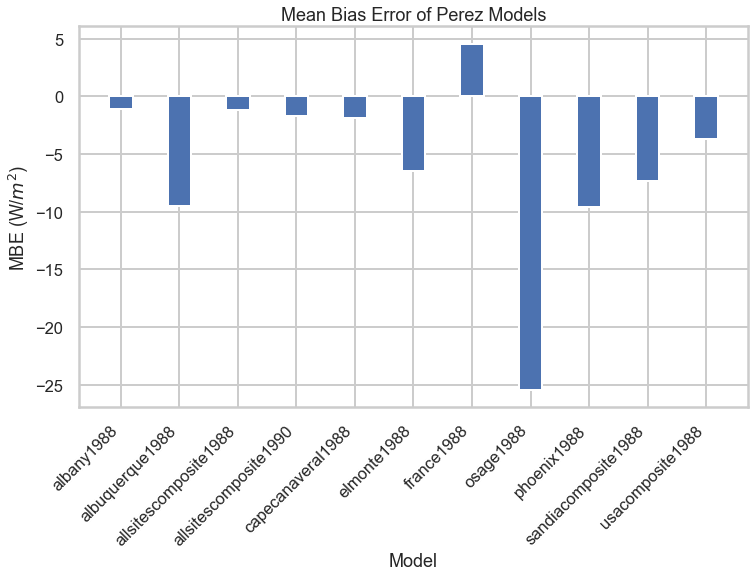

In [36]:
X = perez_poa_results.groupby(['Model']).mean().index
Y= perez_poa_results.groupby(['Model']).mean()['DGpoa_W/m2']
#Z = ngd_comp['GrDfs - DGpoa_W/m2']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, Y, 0.4)
#plt.bar(X_axis + 0.2, Z, 0.4, label = 'Ground Diffuse Considered')
  
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("MBE (W/$m^2$)")
plt.title("Mean Bias Error of Perez Models")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')

# for label in ax.xaxis.get_majorticklabels():
#     label.set_transform(label.get_transform() + offset)
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'All Perez Models')

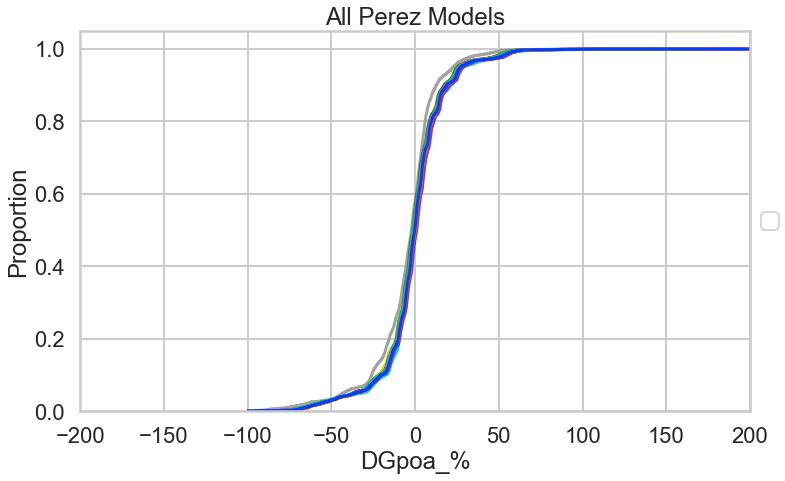

In [43]:
sns.ecdfplot(data=perez_poa_results, x='DGpoa_%', hue='Model', palette='bright')
plt.xlim(-200,200)
plt.ylim(0,1.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))#, labels=['Isotropic', 'Perez', 'Haydavies','Klucher', 'Reindl', 'King'] )
plt.title('All Perez Models')

Text(0, 0.5, 'Bias Error (%)')

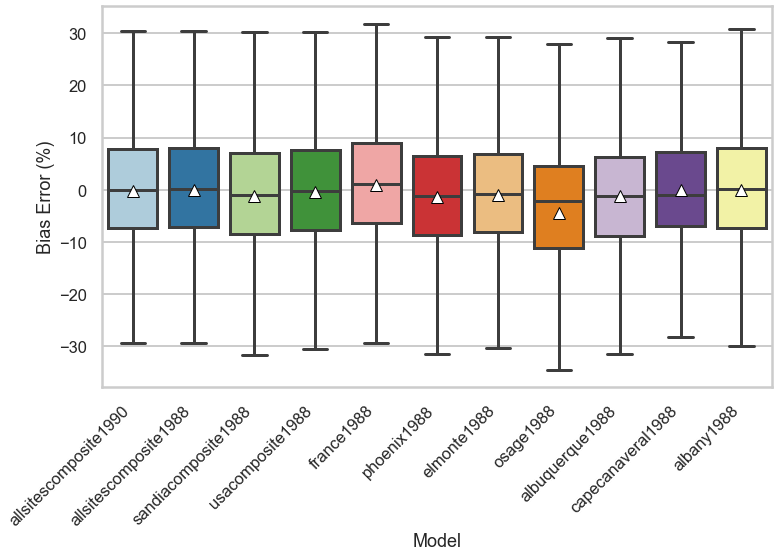

In [37]:
sns.boxplot(data=perez_poa_results, x='Model', y='DGpoa_%', showfliers=False, palette='Paired', showmeans=True,
           meanprops={"markerfacecolor":"white", "markeredgecolor":"black", "markersize":"12"})
plt.xticks(rotation=45, ha='right')
plt.ylabel( 'Bias Error (%)')

# lagniappe

In [22]:
models = ['Perez','Perez - allsitescomposite1988', 'Perez - sandiacomposite1988','Perez - albuquerque1988']
for model in models:
    poa_global['Error - ' + model] = 100*((poa_global[model] - poa_global['Measured POA irradiance'])/(poa_global['Measured POA irradiance']))

In [23]:
poa_monthly = abs(poa_global.resample('M').mean())
poa_monthly['Month'] = poa_monthly.index.month
poa_monthly.dropna(inplace=True)

In [24]:
poa_monthly_grouped = poa_monthly.groupby(by=poa_monthly.index.month).mean()

Text(0, 0.5, 'MAPE (%)')

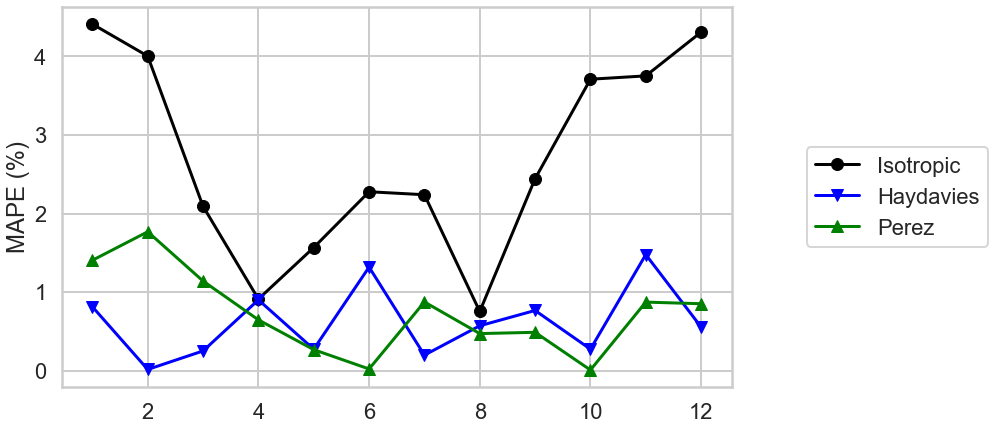

In [25]:

fig, ax = plt.subplots()
x = poa_monthly_grouped['Month']
y = poa_monthly_grouped['Error - Isotropic']
ax.plot(x, y, 'black', marker='o', zorder=6.5)
y = poa_monthly_grouped['Error - Haydavies']
ax.plot(x, y, 'blue', marker='v', zorder=6.5)
y = poa_monthly_grouped['Error - Perez']
ax.plot(x, y, 'green', marker='^', zorder=6.5)
ax.legend(['Isotropic', 'Haydavies', 'Perez'],loc='center right',bbox_to_anchor=(1.4, 0.5))
ax.set_ylabel('MAPE (%)')

Text(0, 0.5, 'MAPE (%)')

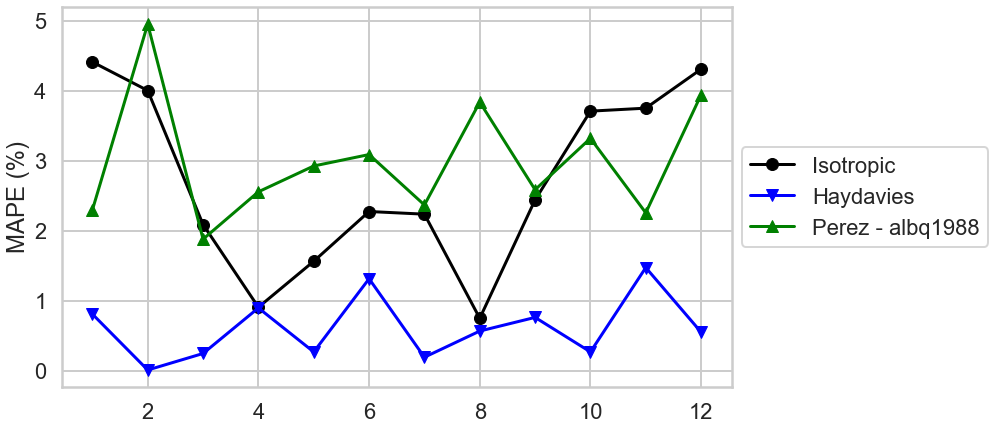

In [26]:
fig, ax = plt.subplots()
x = poa_monthly_grouped['Month']
y = poa_monthly_grouped['Error - Isotropic']
ax.plot(x, y, 'black', marker='o', zorder=6.5)
y = poa_monthly_grouped['Error - Haydavies']
ax.plot(x, y, 'blue', marker='v', zorder=6.5)
y = poa_monthly_grouped['Error - Perez - albuquerque1988']
ax.plot(x, y, 'green', marker='^', zorder=6.5)
ax.legend(['Isotropic', 'Haydavies', 'Perez - albq1988'],loc='center right',bbox_to_anchor=(1.4, 0.5))
ax.set_ylabel('MAPE (%)')

Text(0.5, 0, 'Month')

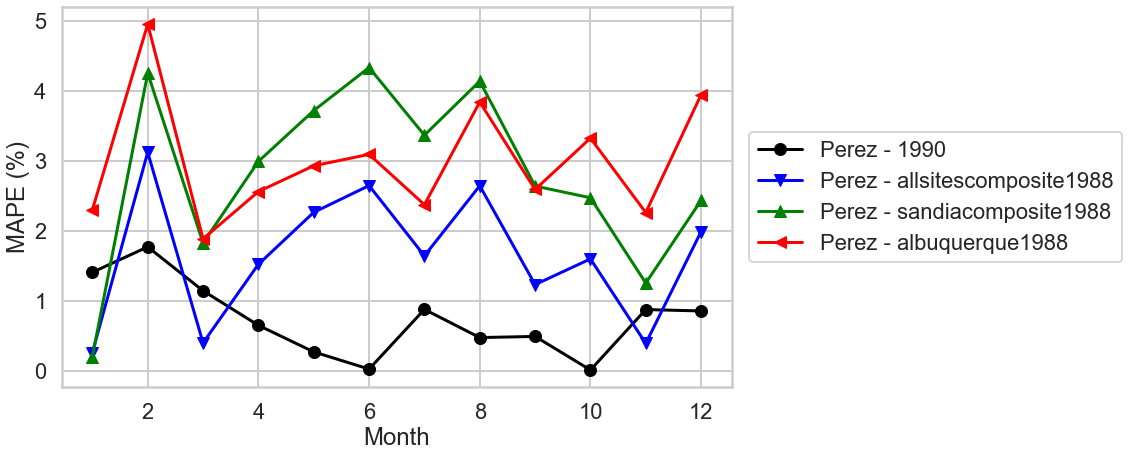

In [27]:
fig, ax = plt.subplots()
x = poa_monthly_grouped['Month']
y = poa_monthly_grouped['Error - Perez']
ax.plot(x, y, 'black', marker='o', zorder=6.5)
y = poa_monthly_grouped['Error - Perez - allsitescomposite1988']
ax.plot(x, y, 'blue', marker='v', zorder=6.5)
y = poa_monthly_grouped['Error - Perez - sandiacomposite1988']
ax.plot(x, y, 'green', marker='^', zorder=6.5)
y = poa_monthly_grouped['Error - Perez - albuquerque1988']
ax.plot(x, y, 'red', marker='<', zorder=6.5)
ax.legend(['Perez - 1990', 'Perez - allsitescomposite1988', 'Perez - sandiacomposite1988', 'Perez - albuquerque1988'],loc='center right',bbox_to_anchor=(1.6, 0.5))
ax.set_ylabel('MAPE (%)')
ax.set_xlabel('Month')

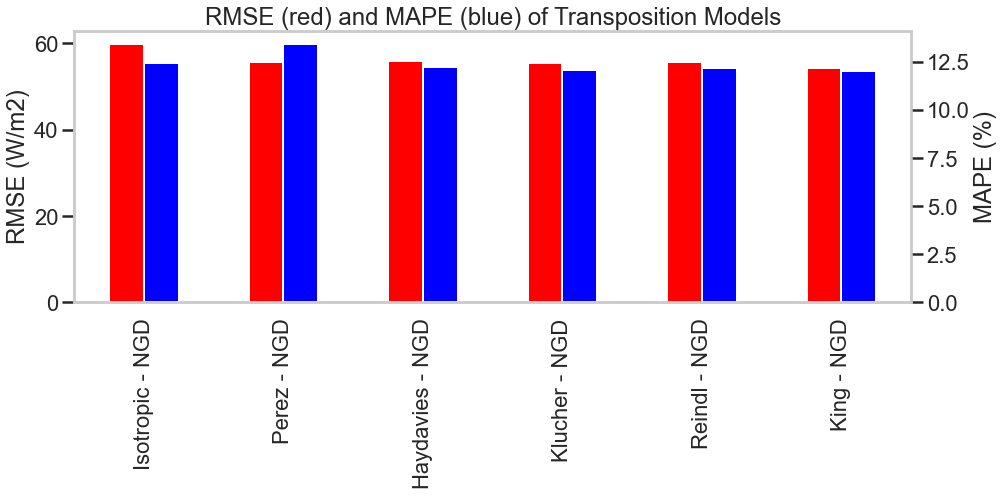

In [19]:
#Calculating RMSE/MAPE/
#need a df with no NaNs first
models = ['Isotropic - NGD','Perez - NGD','Haydavies - NGD', 'Klucher - NGD','Reindl - NGD','King - NGD']
for model in models:
    poa_global['Error - ' + model] = 100*((poa_global[model] - poa_global['Measured POA irradiance'])/(poa_global['Measured POA irradiance']))
rmse = []
nandrop_poa_global = poa_global.dropna()
for model in models:
    rmserror = sqrt(mean_squared_error(nandrop_poa_global['Measured POA irradiance'],nandrop_poa_global[model]))
    rmse.append(rmserror)
    
model_res = pd.DataFrame(rmse, index=models)
model_res.rename(columns = {0 : 'RMSE'}, inplace = True)

mape =[]
for model in models:
    maperror = (abs(poa_global['Error - ' + model])).sum()/(len(poa_global['Error - ' + model]))
    mape.append(maperror)
model_res['MAPE'] = mape


#plotting
model_res.plot.bar(figsize=(15,5), secondary_y= 'MAPE', color=['red','blue'])
plt.grid(False)
plt.title('RMSE (red) and MAPE (blue) of Transposition Models')
ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
ax1.set_ylabel('RMSE (W/m2)')
#ax1.set_ylim(0,35)
ax2.set_ylabel('MAPE (%)')
ax1.get_legend().remove()
#ax2.set_ylim(0,1.5)

In [20]:
model_res

,RMSE,MAPE
Isotropic - NGD,59.970172,12.445310
Perez - NGD,55.643335,13.439958
Haydavies - NGD,55.990665,12.201324
Klucher - NGD,55.463330,12.078473
Reindl - NGD,55.813290,12.171101
King - NGD,54.410475,12.041142


In [2]:
import numpy as np

In [5]:
np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  ,
       0.95, 0.99])

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD ,fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()
        # Correlation labels
        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
        tlocs = np.arccos(rlocs) # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs) # Positions
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
        # Standard deviation axis extent
        self.smin = 0
        self.smax = 1.2 * self.STD
        gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1,)
        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)
        # Angle axis
        ax.grid()
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Corr. Coeff")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')        
        # X axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("St Dev ($W/m^2$)")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')
        # Y axis
        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("St Dev ($W/m^2$)")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')
        # Useless
        ax.axis['bottom'].set_visible(False)
        # Contours along standard deviations
        ax.grid()
        self._ax = ax # Graphical axes
        self.ax = ax.get_aux_axes(tr) # Polar coordinates
        # Add reference point and STD contour
        l , = self.ax.plot([0], self.STD, '*', ls='', ms=16,c='black', label=label)
        t = np.linspace(0, (np.pi/2))
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_')
        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]
    def add_sample(self,STD,r,*args,**kwargs):
        l,= self.ax.plot(np.arccos(r), STD, *args, **kwargs) # (theta, radius)
        self.samplePoints.append(l)
        return l
    def add_contours(self,levels=5,**kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
        RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
        return contours

def srl(obsSTD, s, r, l, fname, markers, colors, handle):
    fig=plt.figure()
    dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='Observed')
    plt.clabel(dia.add_contours(colors='0.5'), inline=1, fontsize=10)
    cs = colors
    m = markers
    srlc = zip(s, r, l, cs, m)
    for i in srlc:
        dia.add_sample(i[0], i[1], label=i[2], c=i[3], marker=i[4], markersize=3)#, mew=0.001)
    spl = [p.get_label() for p in dia.samplePoints]
    fig.legend(prop=dict(size='small'), loc=[0.7, 0.6],handles=handle)
    #fig.legend(False)
    #plt.title('Module Temperature', fontsize=8)
    plt.savefig(fname, dpi=300)
    plt.clf()
    plt.close(fig)
    